![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [302]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [303]:
# Here you run your code to explore the data
df_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
df_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t', index_col=0)
df_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz',sep='\t', encoding= 'unicode_escape')

In [304]:
# Create your connection.
cnx = sqlite3.connect('zippedData/im.db')

df_movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", cnx)
df_movie_ratings = pd.read_sql_query("SELECT * FROM principals", cnx)
df_movie_persons = pd.read_sql_query("SELECT * FROM persons", cnx)
df_known_for = pd.read_sql_query("SELECT * FROM known_for", cnx)
df_directors = pd.read_sql_query("SELECT * FROM directors", cnx)
df_principals = pd.read_sql_query("SELECT * FROM principals", cnx)

In [305]:
df_movie_info.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [306]:
conn = sqlite3.connect('zippedData\im.db')

basics_and_ratings = pd.read_sql("""
SELECT *
FROM movie_basics
LEFT JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
    """, conn )

people = pd.read_sql("""
SELECT *
FROM directors
LEFT JOIN persons
    ON directors.person_id = persons.person_id
LEFT JOIN movie_basics
    ON directors.movie_id = movie_basics.movie_id
    """, conn )

In [307]:
basics_and_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119.0


In [308]:
df_movie_gross.rename(columns={'title':'movie'}, inplace=True)

df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [309]:
df_movie_gross.loc[1872, 'foreign_gross'] = '1131561399'
df_movie_gross.loc[3079, 'foreign_gross'] = '1369544272'
df_movie_gross.loc[1873, 'foreign_gross'] = '1018130012'
df_movie_gross.loc[2760, 'foreign_gross'] = '1009996733'
df_movie_gross.loc[1874, 'foreign_gross'] = '1162040651'

df_movie_gross['foreign_gross'] = df_movie_gross['foreign_gross'].astype(float)

df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [310]:
df_movie_gross['total_gross'] = df_movie_gross['domestic_gross'] + df_movie_gross['foreign_gross']

# df_movie_gross_25 = df_movie_gross.sort_values(by=['total_gross'], ascending=False).head(25)

df_top_gross_studios = df_movie_gross.sort_values(by=['total_gross'], ascending=False).head(25).groupby('studio').sum()
df_top_gross_studios = df_top_gross_studios.sort_values(by=['total_gross'], ascending=False)

df_top_gross_studios.reset_index(inplace=True)

In [311]:
df_top_gross_studios.head(10)

,studio,domestic_gross,foreign_gross,year,total_gross
0,BV,7.536900e+09,1.150321e+10,28209,1.904011e+10
1,Uni.,1.985000e+09,4.905367e+09,10080,6.890367e+09
2,WB,1.164200e+09,2.410000e+09,6041,3.574200e+09
3,P/DW,3.524000e+08,7.714000e+08,2011,1.123800e+09
4,Sony,3.044000e+08,8.042000e+08,2012,1.108600e+09
5,Par.,2.454000e+08,8.586000e+08,2014,1.104000e+09


In [312]:
df_movie_budgets['production_budget'] = df_movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df_movie_budgets['domestic_gross'] = df_movie_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
df_movie_budgets['worldwide_gross'] = df_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# df_movie_budgets.sort_values(by=['worldwide_gross'], ascending=False).head(25)

In [313]:
df_budget_gross = pd.merge(df_movie_gross, df_movie_budgets, on = 'movie', how = 'left')

In [314]:
df_budget_gross = df_budget_gross[df_budget_gross['worldwide_gross'].notna()]

df_budget_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 3290
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1247 non-null   object 
 1   studio             1246 non-null   object 
 2   domestic_gross_x   1245 non-null   float64
 3   foreign_gross      1086 non-null   float64
 4   year               1247 non-null   int64  
 5   total_gross        1084 non-null   float64
 6   id                 1247 non-null   float64
 7   release_date       1247 non-null   object 
 8   production_budget  1247 non-null   float64
 9   domestic_gross_y   1247 non-null   float64
 10  worldwide_gross    1247 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 116.9+ KB


In [315]:
df_budget_gross = df_budget_gross.drop(df_budget_gross.columns[[2, 3, 4, 5, 6]], axis=1)

In [316]:
df_budget_gross['gross_budget_ratio'] = df_budget_gross['worldwide_gross'] / df_budget_gross['production_budget']

df_top_ratio = df_budget_gross[df_budget_gross['worldwide_gross'] > 1000000000].sort_values(by=['gross_budget_ratio'], ascending=False).head(10)

df_top_ratio.rename(columns={'domestic_gross_y':'domestic_gross'}, inplace=True)

In [317]:
df_top_ratio.reset_index(drop=True)

,movie,studio,release_date,production_budget,domestic_gross,worldwide_gross,gross_budget_ratio
0,Minions,Uni.,"Jul 10, 2015",74000000.0,336045770.0,1.160336e+09,15.680219
1,Despicable Me 3,Uni.,"Jun 30, 2017",75000000.0,264624300.0,1.034728e+09,13.796370
2,Frozen,BV,"Nov 22, 2013",150000000.0,400738009.0,1.272470e+09,8.483133
3,Furious 7,Uni.,"Apr 3, 2015",190000000.0,353007020.0,1.518723e+09,7.993278
4,Jurassic World: Fallen Kingdom,Uni.,"Jun 22, 2018",170000000.0,417719760.0,1.305773e+09,7.681016
5,Jurassic World,Uni.,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,7.669092
6,Aquaman,WB,"Dec 21, 2018",160000000.0,335061807.0,1.146895e+09,7.168092
7,Avengers: Infinity War,BV,"Apr 27, 2018",300000000.0,678815482.0,2.048134e+09,6.827114
8,Zootopia,BV,"Mar 4, 2016",150000000.0,341268248.0,1.019430e+09,6.796197
9,Black Panther,BV,"Feb 16, 2018",200000000.0,700059566.0,1.348258e+09,6.741291


In [318]:
df_top_ratio.reset_index(drop=True, inplace=True)

In [319]:
df_top_ratio.head(10)

,movie,studio,release_date,production_budget,domestic_gross,worldwide_gross,gross_budget_ratio
0,Minions,Uni.,"Jul 10, 2015",74000000.0,336045770.0,1.160336e+09,15.680219
1,Despicable Me 3,Uni.,"Jun 30, 2017",75000000.0,264624300.0,1.034728e+09,13.796370
2,Frozen,BV,"Nov 22, 2013",150000000.0,400738009.0,1.272470e+09,8.483133
3,Furious 7,Uni.,"Apr 3, 2015",190000000.0,353007020.0,1.518723e+09,7.993278
4,Jurassic World: Fallen Kingdom,Uni.,"Jun 22, 2018",170000000.0,417719760.0,1.305773e+09,7.681016
5,Jurassic World,Uni.,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,7.669092
6,Aquaman,WB,"Dec 21, 2018",160000000.0,335061807.0,1.146895e+09,7.168092
7,Avengers: Infinity War,BV,"Apr 27, 2018",300000000.0,678815482.0,2.048134e+09,6.827114
8,Zootopia,BV,"Mar 4, 2016",150000000.0,341268248.0,1.019430e+09,6.796197
9,Black Panther,BV,"Feb 16, 2018",200000000.0,700059566.0,1.348258e+09,6.741291


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [320]:
df_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t', index_col=0)
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [321]:
df_movie_info = df_movie_info[df_movie_info['box_office'].notna()]

df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 1996
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      340 non-null    object
 1   rating        340 non-null    object
 2   genre         340 non-null    object
 3   director      299 non-null    object
 4   writer        273 non-null    object
 5   theater_date  334 non-null    object
 6   dvd_date      334 non-null    object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       338 non-null    object
 10  studio        305 non-null    object
dtypes: object(11)
memory usage: 31.9+ KB


In [322]:
df_movie_info['box_office'] = df_movie_info['box_office'].replace('[\$,]', '', regex=True).astype(float)

In [356]:
mpaa_ratings = df_movie_info.sort_values(by=['box_office']).groupby('rating').mean()

In [357]:
mpaa_ratings.reset_index(drop=False, inplace=True)

mpaa_ratings.head(10)

,rating,box_office
0,G,3.044796e+07
1,NC17,1.260219e+06
2,NR,2.486249e+06
3,PG,5.103356e+07
4,PG-13,5.652015e+07
5,R,2.323176e+07


In [358]:
mpaa_ratings = mpaa_ratings.sort_values(by='box_office', ascending=False)

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

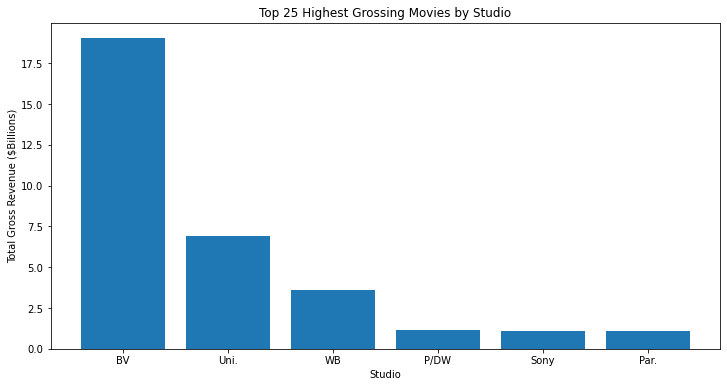

In [359]:
# Here you run your code to model the data
fig, ax = plt.subplots(figsize=(12, 6))


ax.bar(df_top_gross_studios['studio'], df_top_gross_studios['total_gross']/1000000000)
ax.set_title('Top 25 Highest Grossing Movies by Studio')
ax.set_xlabel('Studio');
ax.set_ylabel('Total Gross Revenue ($Billions)')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False);

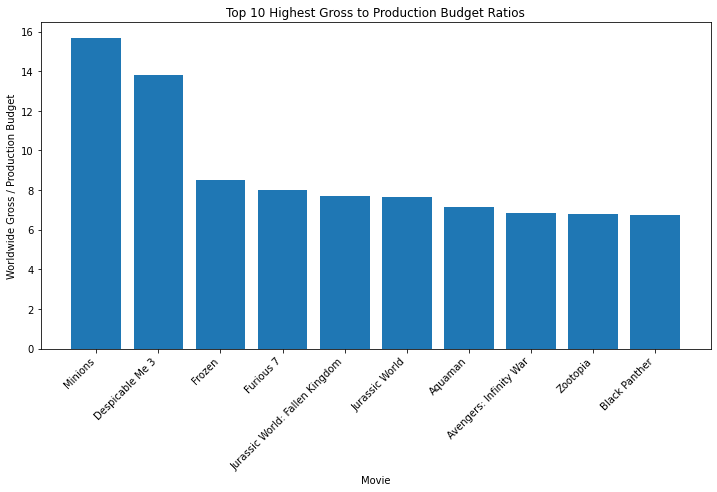

In [325]:
fig, ax = plt.subplots(figsize=(12, 6))


ax.bar(df_top_ratio['movie'], df_top_ratio['gross_budget_ratio'])
ax.set_title('Top 10 Highest Gross to Production Budget Ratios')
ax.set_xlabel('Movie');
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Worldwide Gross / Production Budget');

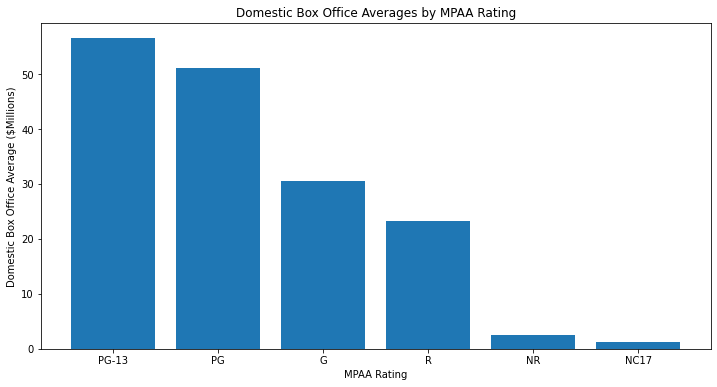

In [361]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(mpaa_ratings['rating'], mpaa_ratings['box_office']/1000000)
ax.set_title('Domestic Box Office Averages by MPAA Rating')
ax.set_xlabel('MPAA Rating');
ax.set_ylabel('Domestic Box Office Average ($Millions)')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False);

In [355]:
df_movie_info.sort_values(by=['box_office'], ascending=False)

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1071,This depiction of the last 12 hours in the lif...,R,Drama,Mel Gibson,Mel Gibson|Benedict Fitzgerald,"Feb 25, 2004","Aug 31, 2004",$,368000000.0,127 minutes,Newmarket Film Group
1136,The Hobbit: An Unexpected Journey follows titl...,PG-13,Action and Adventure|Science Fiction and Fantasy,Peter Jackson,Peter Jackson|Philippa Boyens|Guillermo del To...,"Dec 14, 2012","Mar 19, 2013",$,303001229.0,170 minutes,Warner Bros.
1525,"In Skyfall, Bond's loyalty to M is tested as h...",PG-13,Action and Adventure|Mystery and Suspense,Sam Mendes,John Logan|Robert Wade|Neal Purvis,"Nov 9, 2012","Mar 11, 2013",$,299300000.0,145 minutes,MGM
883,"Now that Greg Focker is ""in"" with his soon-to-...",PG-13,Comedy,Jay Roach,Jim Herzfeld|John Hamburg,"Dec 22, 2004","Apr 26, 2005",$,279167575.0,118 minutes,Universal Pictures
1442,Youthful wizard Harry Potter returns to the sc...,PG,Kids and Family|Science Fiction and Fantasy,Chris Columbus,Steve Kloves,"Nov 15, 2002","Apr 11, 2003",$,261835892.0,161 minutes,Warner Bros. Pictures
...,...,...,...,...,...,...,...,...,...,...,...
1639,In this darkly erotic drama from cult filmmake...,NR,Art House and International|Drama,Jeanne Labrune,Jeanne Labrune|Richard Debuisne,"Aug 26, 2011","Jan 17, 2012",$,8856.0,95 minutes,First Run Features
884,Freebie (James Caan) and the Bean (Alan Arkin)...,R,Action and Adventure|Comedy|Drama,Richard Rush,Robert Kaufman,"Dec 25, 1974","Jan 11, 2011",$,8300.0,114 minutes,Warner Bros. Pictures
895,"After a sexual assault by a random stranger, S...",NR,Drama|Horror|Mystery and Suspense,Eric England,Eric England,"Nov 22, 2013","Mar 18, 2014",$,3328.0,84 minutes,IFC Films


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***